<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython import display
sns.set_style("dark")

In [9]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# torchvision.trantransforms

In [0]:
# Create a transformer (some what a image pre processing pipeline)


#The compose function allows for multiple transforms
#transforms.ToTensor() converts our PILImage to a tensor of shape (C x H x W) in the range [0,1]
#transforms.Normalize(mean,std) normalizes a tensor to a (mean, std) for (R, G, B)



transformer = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5))])

In [15]:
! wget https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/e68a0828405426d6dd8b1aeb6c28775cb7d1df02/4-Figure2-1.png

--2019-06-03 19:11:10--  https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/e68a0828405426d6dd8b1aeb6c28775cb7d1df02/4-Figure2-1.png
Resolving ai2-s2-public.s3.amazonaws.com (ai2-s2-public.s3.amazonaws.com)... 52.218.201.18
Connecting to ai2-s2-public.s3.amazonaws.com (ai2-s2-public.s3.amazonaws.com)|52.218.201.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 598062 (584K) [binary/octet-stream]
Saving to: ‘4-Figure2-1.png’

4-Figure2-1.png     100%[===================>] 584.04K  --.-KB/s    in 0.08s   

2019-06-03 19:11:10 (7.50 MB/s) - ‘4-Figure2-1.png’ saved [598062/598062]



In [0]:
sample_image = Image.open("4-Figure2-1.png")

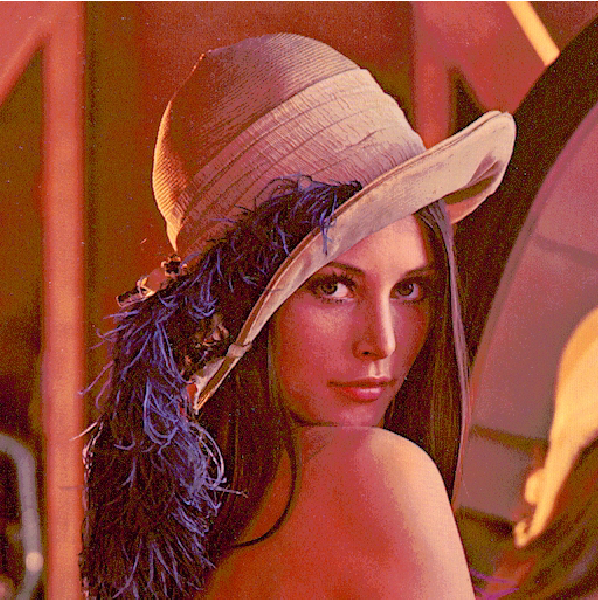

In [21]:
sample_image

In [22]:
sample_image.height, sample_image.width

(600, 598)

### torchvision.transforms.ToTensor

In [28]:
sample_image_array = torchvision.transforms.ToTensor()(sample_image)
sample_image_array.shape

torch.Size([3, 600, 598])

#### Point to note Torch keeps Channel number at first and not like Tf

### torchvision.transforms.ToPILImage

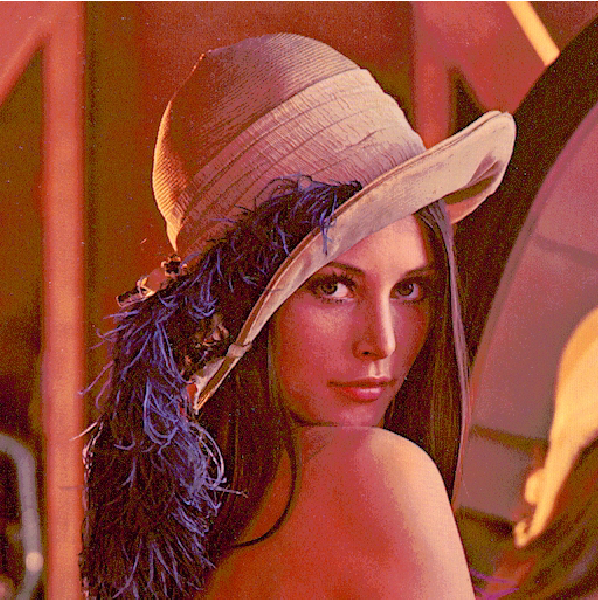

In [29]:
torchvision.transforms.ToPILImage()(sample_image_array)

### torchvision.transforms.Grayscale

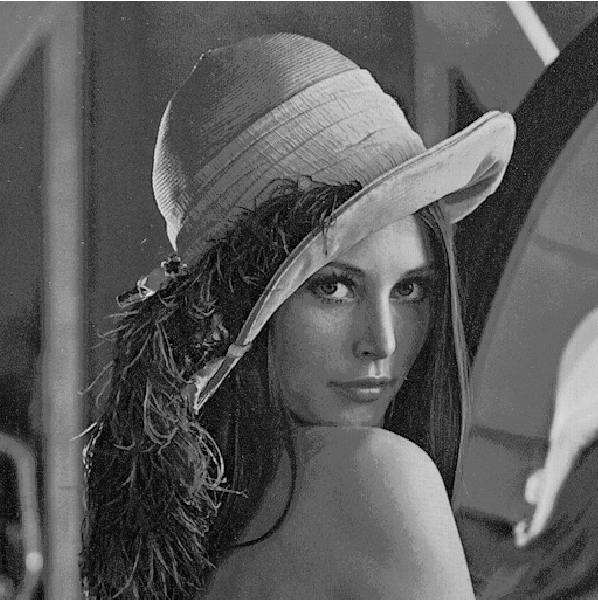

In [30]:
torchvision.transforms.Grayscale()(sample_image)

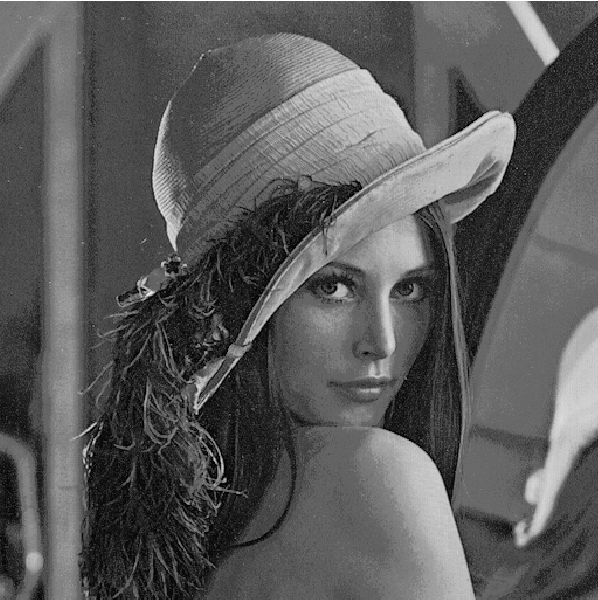

In [56]:
torchvision.transforms.RandomGrayscale(p=0.9)(sample_image)

### torchvision.transforms.RandomCrop

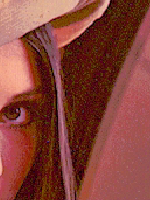

In [39]:
torchvision.transforms.RandomCrop((200, 150))(sample_image)

### torchvision.transforms.CenterCrop

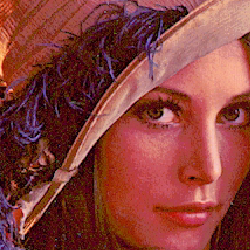

In [44]:
torchvision.transforms.CenterCrop((250, 250))(sample_image)

### Randomly change Brightness Contrast Saturation

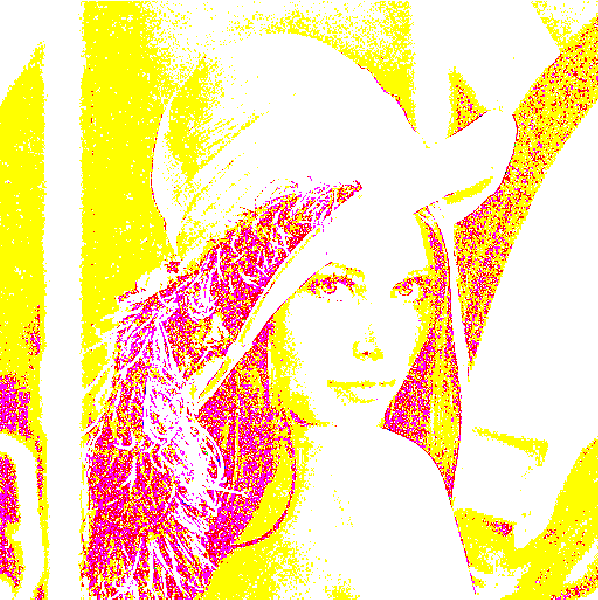

In [47]:
torchvision.transforms.ColorJitter(brightness=(10.0, 20.0), contrast=(20, 30), saturation=(10, 20))(sample_image)

### torchvision.transforms.Pad

padding_mode (str) –

Type of padding. Should be: constant, edge, reflect or symmetric. Default is constant.

> **constant**: pads with a constant value, this value is specified with fill

> **edge**: pads with the last value at the edge of the image

> **reflect**: pads with reflection of image without repeating the last value on the edge

> > For example, padding [1, 2, 3, 4] with 2 elements on both sides in reflect mode will result in [3, 2, 1, 2, 3, 4, 3, 2]

> **symmetric**: pads with reflection of image repeating the last value on the edge

> > For example, padding [1, 2, 3, 4] with 2 elements on both sides in symmetric mode will result in [2, 1, 1, 2, 3, 4, 4, 3]









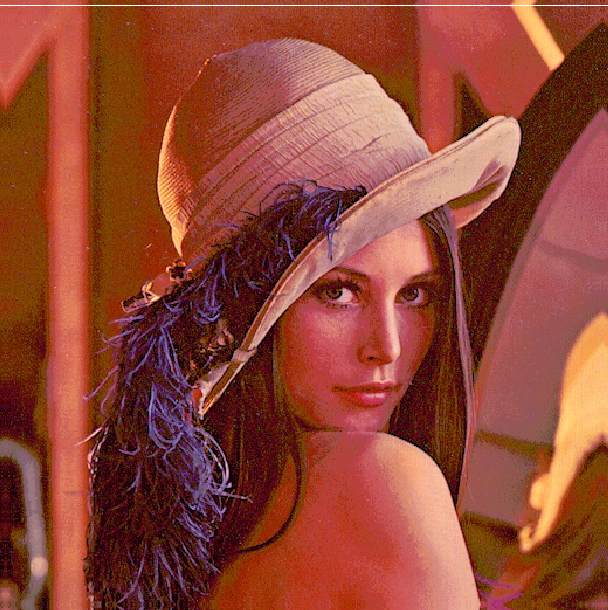

In [53]:
torchvision.transforms.Pad(padding=(5, 5), fill=200, padding_mode="reflect")(sample_image)

### torchvision.transforms.Resize

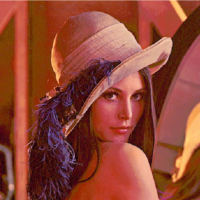

In [58]:
torchvision.transforms.Resize(size=(200, 200))(sample_image)

In [37]:
train_set = torchvision.datasets.CIFAR100(root="./cifardata", train=True, download=True, transform=transformer)

Files already downloaded and verified
